Rithika Devarakonda


An Exploration in Creating a Random Community Detection Algorithm

In [638]:
import numpy as np
import random
from itertools import islice
import networkx as nx
import matplotlib.pyplot as plt
import communities

def create_clusters(edgelist):

  e_list = edgelist.nodes

  #https://www.geeksforgeeks.org/generating-random-number-list-in-python/
  #to generate random value for the length_to_split list and that is what creates "communities"
  rand_list = []
  for i in range(len(e_list)):
    #generates random integer in every slot to determine where sublists are created based on the index position
    rand_list.append(random.randint(1, len(e_list)))

  #https://www.geeksforgeeks.org/python-split-a-list-into-sublists-of-given-lengths/
  #splits the list into sublists or communities
  #we need the iter() function to make sure we don't have any repeats otherwise we have results like: [['A'], ['A', 'B', 'C'], ['A', 'B']]
  input = iter(e_list) 
  output = [list(islice(input, node)) for node in rand_list]
  
  #https://www.geeksforgeeks.org/python-remove-empty-list-from-list/
  #removing all the empty sublists because random values may not all add up to the length of our edgelist
  communities = [subgroup for subgroup in output if subgroup != []]

  modularity = nx.community.modularity(edgelist, communities)
  
  group_assignment = []
  
  for element in communities:
    for value in element:
        group_assignment.append(communities.index(element))
    
  return(communities, e_list, group_assignment, modularity)


In [639]:
#https://www.datacamp.com/tutorial/social-network-analysis-python

G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A', 'B')
G_asymmetric.add_edge('C', 'C')
G_asymmetric.add_edge('C','D')

groups = create_clusters(G_asymmetric)

In [640]:
groups

([['A', 'B', 'C'], ['D']], NodeView(('A', 'B', 'C', 'D')), [0, 0, 0, 1], 0.0)

In [641]:
groups[2]

[0, 0, 0, 1]

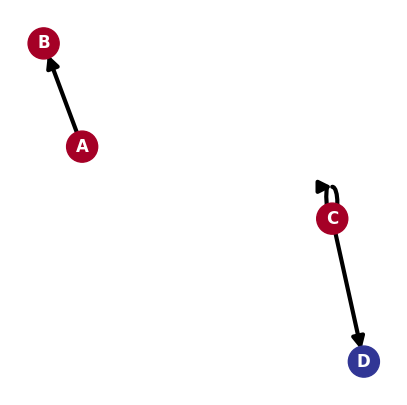

In [642]:
#https://stackoverflow.com/questions/40941264/how-to-draw-a-small-graph-with-community-structure-in-networkx 
#https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html
#https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html
#https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html

pos = nx.spring_layout(G_asymmetric)  # compute graph layout
plt.figure(figsize = (5, 5))  # image is 5 x 5 inches
plt.axis('off')
nx.draw_networkx_nodes(G_asymmetric, pos, node_size = 500, cmap = plt.cm.RdYlBu, node_color = groups[2])
nx.draw_networkx_edges(G_asymmetric, pos, width = 3, arrowsize = 18)
nx.draw_networkx_labels(G_asymmetric, pos, font_color = "white", font_weight = "bold")
plt.show(G_asymmetric)


In [643]:
G_large = nx.DiGraph()
for x in range(50):
    G_large.add_edge(random.randint(1, 100), random.randint(1, 100))

In [644]:
g = create_clusters(G_asymmetric)[2]
g

[0, 0, 0, 0]

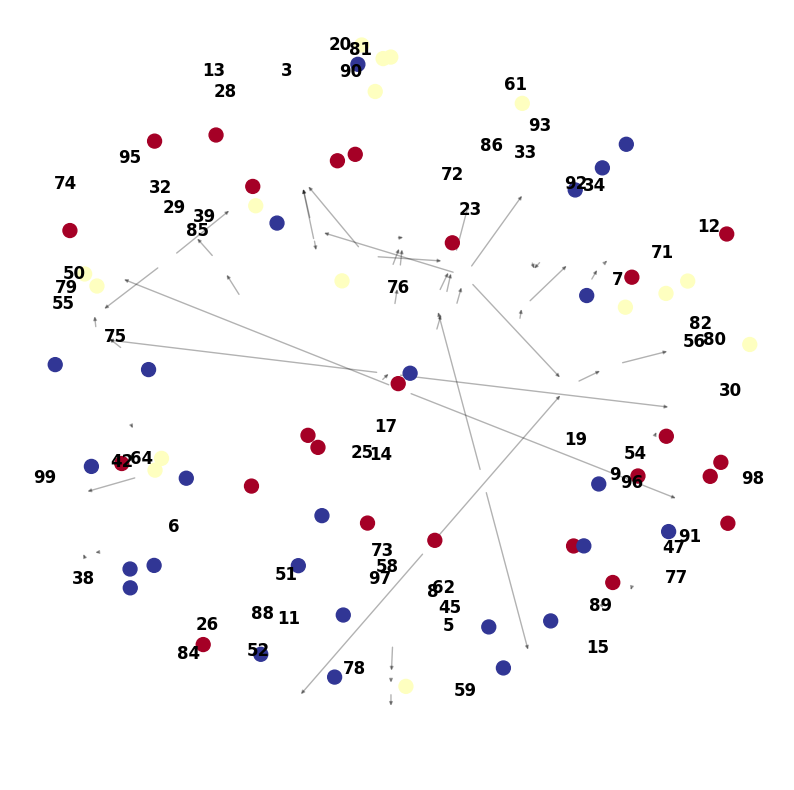

In [645]:
plt.figure(figsize = (10, 10))
plt.axis('off')
nx.draw_networkx_nodes(G_large, nx.spring_layout(G_large), node_size = 100, cmap = plt.cm.RdYlBu, node_color = create_clusters(G_large)[2])
nx.draw_networkx_edges(G_large, nx.spring_layout(G_large), width = 1, arrowsize = 5, alpha = 0.3)
nx.draw_networkx_labels(G_large, nx.spring_layout(G_large), font_color = "black", font_weight = "bold")
plt.show(G_large)

In [646]:
letters = ["R", "I", "T", "H", "I", "K", "A"]

G_name = nx.DiGraph()
for x in range(50):
    G_name.add_edge(letters[random.randint(0, len(letters)-1)], letters[random.randint(0, len(letters)-1)])

In [647]:
r = create_clusters(G_name)
r

([['K', 'I', 'R', 'H', 'A', 'T']],
 NodeView(('K', 'I', 'R', 'H', 'A', 'T')),
 [0, 0, 0, 0, 0, 0],
 1.1102230246251565e-16)

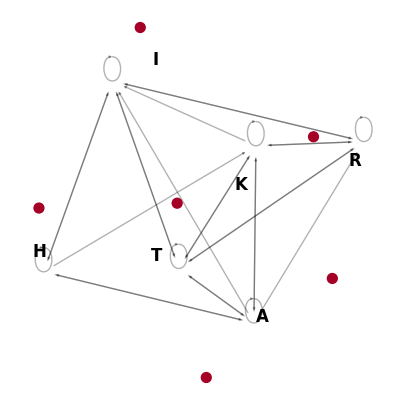

In [648]:
plt.figure(figsize = (5, 5))
plt.axis('off')
nx.draw_networkx_nodes(G_name, nx.spring_layout(G_name), node_size = 50, cmap = plt.cm.RdYlBu, node_color = r[2])
nx.draw_networkx_edges(G_name, nx.spring_layout(G_name), width = 1, arrowsize = 3, alpha = 0.3)
nx.draw_networkx_labels(G_name, nx.spring_layout(G_name), font_color = "black", font_weight = "bold")
plt.show(G_name)

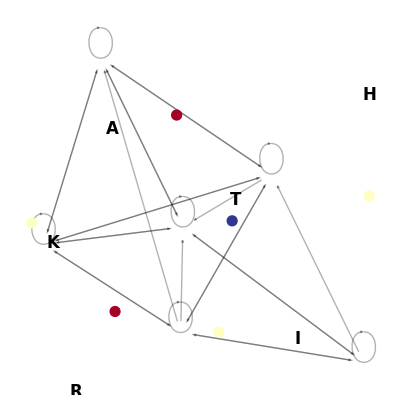

In [649]:
plt.figure(figsize = (5, 5))
plt.axis('off')
nx.draw_networkx_nodes(G_name, nx.spring_layout(G_name), node_size = 50, cmap = plt.cm.RdYlBu, node_color = create_clusters(G_name)[2])
nx.draw_networkx_edges(G_name, nx.spring_layout(G_name), width = 1, arrowsize = 3, alpha = 0.3)
nx.draw_networkx_labels(G_name, nx.spring_layout(G_name), font_color = "black", font_weight = "bold")
plt.show(G_name)

In [650]:
def optimal_random(edgelist):
    cases = []
    cases.append(create_clusters(edgelist))

    for i in range(1000):
        x = create_clusters(edgelist)
        if(x not in cases):
            cases.append(x)

    #set maximum to first modularity score
    max = cases[0][3]

    for j in range(1, len(cases)):
        #if the next entry is greater, the max is now the value at the j-th index
        if cases[j][3] > max:
            max = cases[j][3]
            max_index = j
    
    return(cases[max_index])

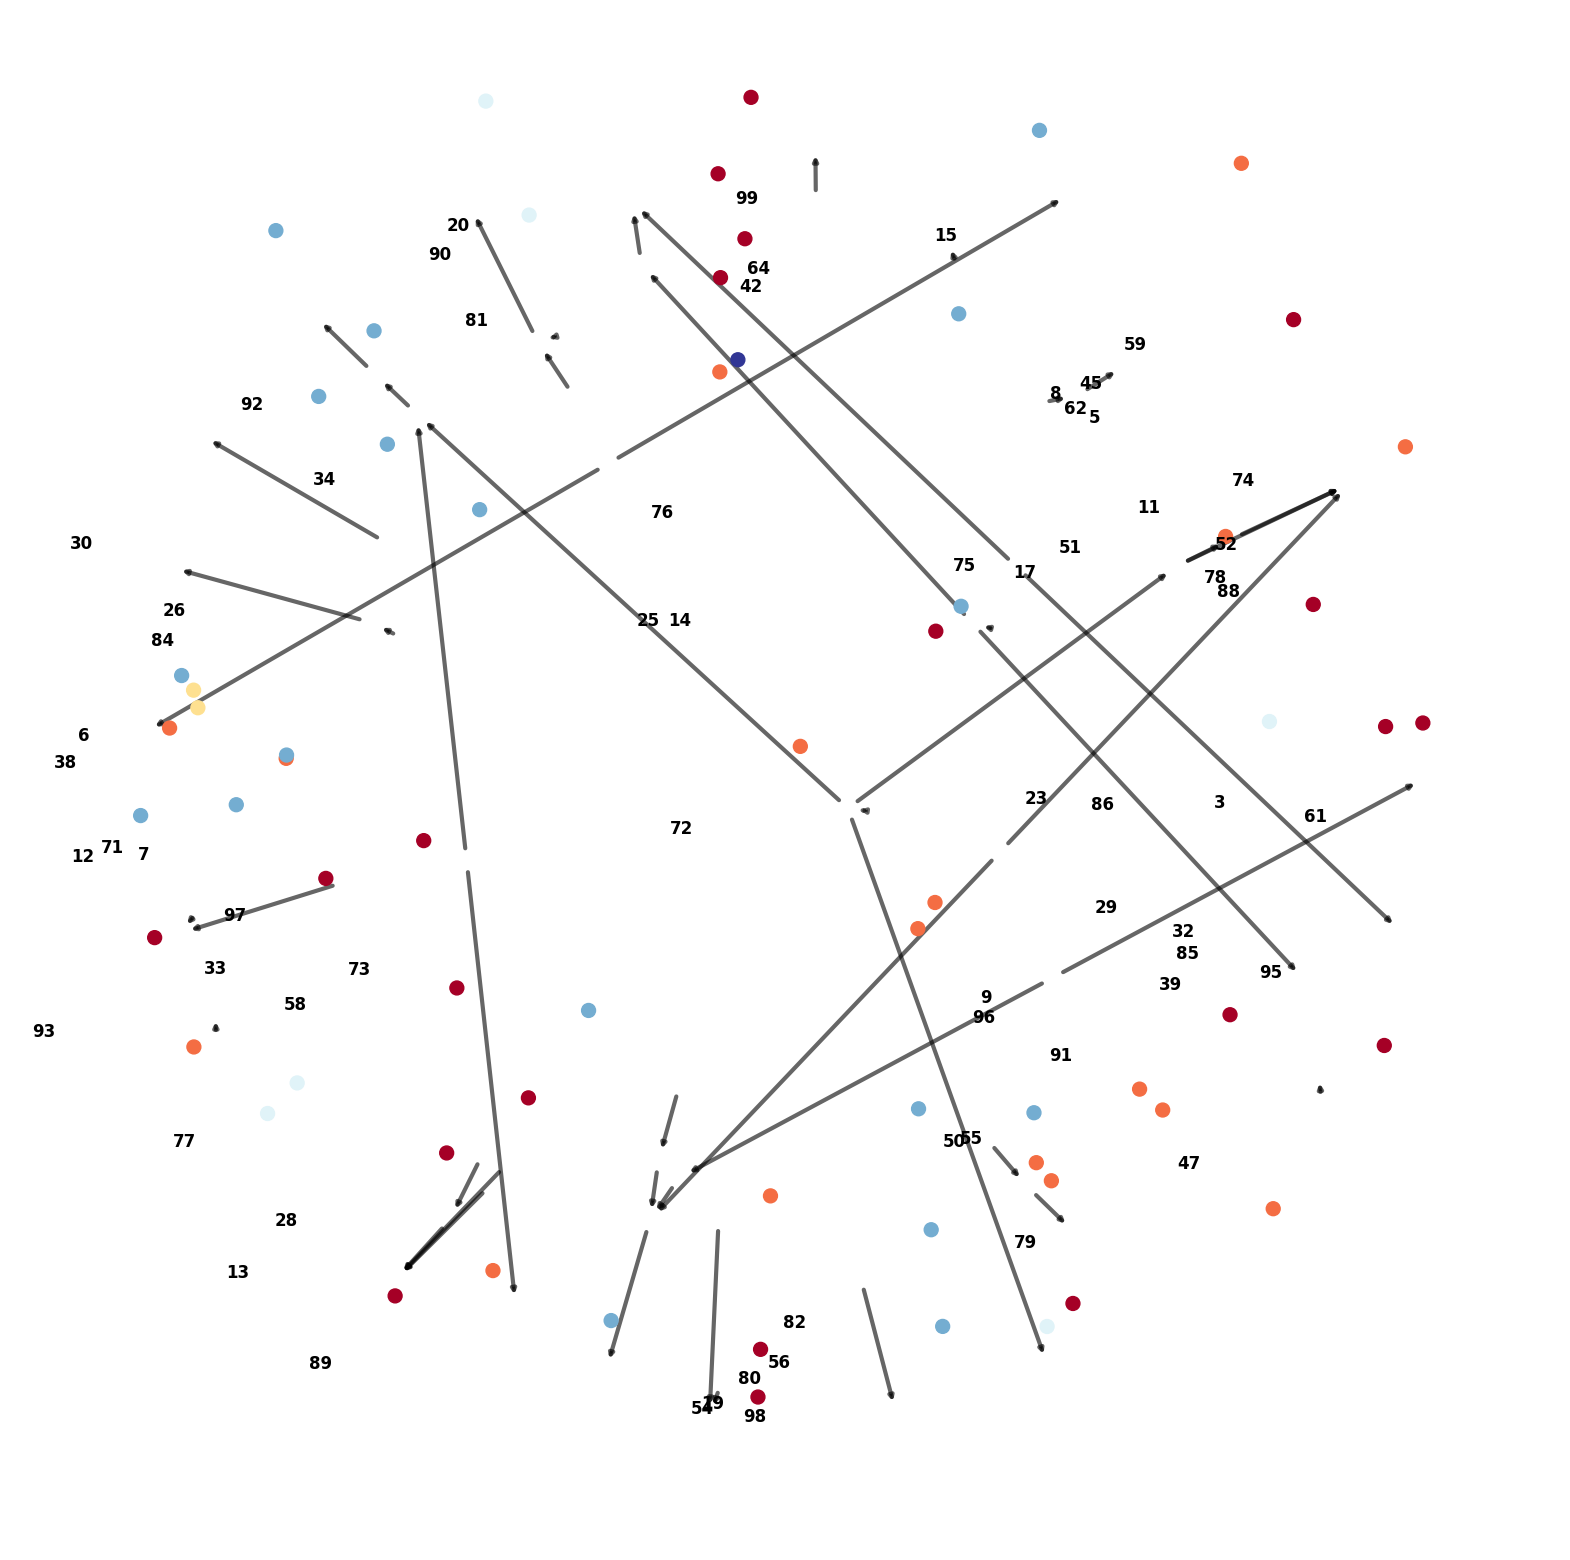

In [651]:
opt = optimal_random(G_large)

plt.figure(figsize = (20, 20))
plt.axis('off')
nx.draw_networkx_nodes(G_large, nx.spring_layout(G_large), node_size = 100, cmap = plt.cm.RdYlBu, node_color = opt[2])
nx.draw_networkx_edges(G_large, nx.spring_layout(G_large), width = 3, arrowsize = 6, alpha = 0.6)
nx.draw_networkx_labels(G_large, nx.spring_layout(G_large), font_color = "black", font_weight = "bold")
plt.show(G_large)

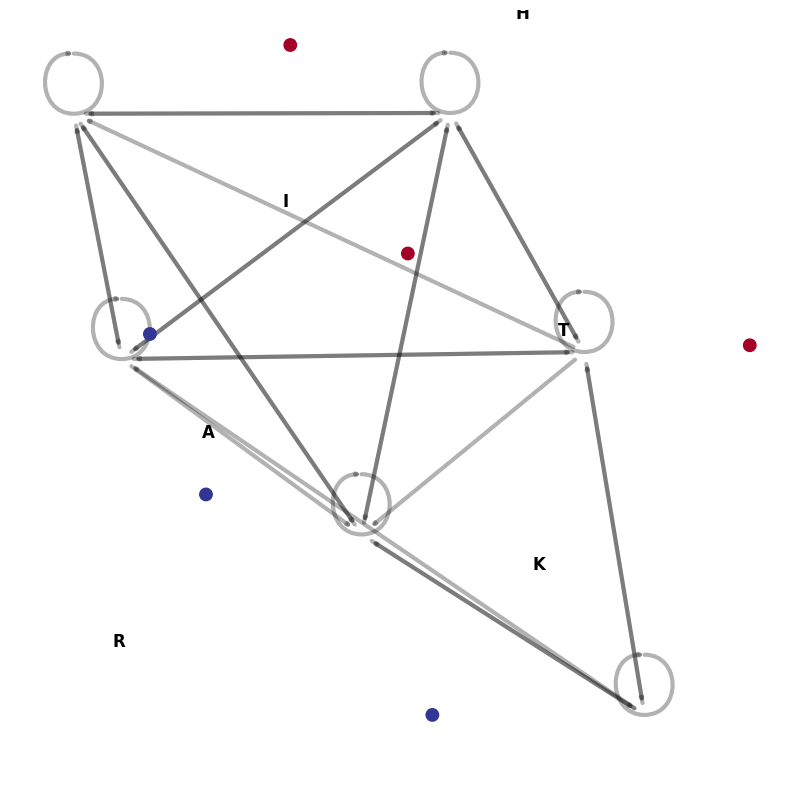

In [652]:
opt_name = optimal_random(G_name)

plt.figure(figsize = (10, 10))
plt.axis('off')
nx.draw_networkx_nodes(G_name, nx.spring_layout(G_name), node_size = 80, cmap = plt.cm.RdYlBu, node_color = opt_name[2])
nx.draw_networkx_edges(G_name, nx.spring_layout(G_name), width = 3, arrowsize = 3, alpha = 0.3)
nx.draw_networkx_labels(G_name, nx.spring_layout(G_name), font_color = "black", font_weight = "bold")
plt.show(G_name)

Resources Consulted

“Generating Random Number List in Python.” GeeksforGeeks, GeeksforGeeks, 18 Aug. 2022, https://www.geeksforgeeks.org/generating-random-number-list-in-python/. 

“Python: Split a List into Sublists of given Lengths.” GeeksforGeeks, GeeksforGeeks, 20 Feb. 2023, https://www.geeksforgeeks.org/python-split-a-list-into-sublists-of-given-lengths/. 

“Python - Remove Empty List from List.” GeeksforGeeks, GeeksforGeeks, 13 Mar. 2023, https://www.geeksforgeeks.org/python-remove-empty-list-from-list/. 

Kapoor, Amita. “Social Network Analysis & Mapping in Python with NetworkX.” DataCamp, DataCamp, 2 Oct. 2018, https://www.datacamp.com/tutorial/social-network-analysis-python. 

“How to Draw a Small Graph with Community Structure in Networkx.” Stack Overflow, 3 Dec. 2016, https://stackoverflow.com/questions/40941264/how-to-draw-a-small-graph-with-community-structure-in-networkx. 

“Draw_networkx_nodes#.” draw_networkx_nodes - NetworkX 3.1 Documentation, https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html. 

“Draw_networkx_edges#.” draw_networkx_edges - NetworkX 3.1 Documentation, https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html. 

“Draw_networkx_labels#.” draw_networkx_labels - NetworkX 3.1 Documentation, https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html. 